# **Covid-19 Vaccines - Sentiment Analysis & Time Series**
Notebook for the second project for the Machine Learning Complements course (CAC).

## **Introduction**


## Imports

The following libraries will be used in this project:

In [1]:
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import utils as ut
import warnings
import seaborn as sns
import contractions
import nltk
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
warnings.simplefilter(action='ignore')


[nltk_data] Downloading package wordnet to /home/oliveira/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oliveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/oliveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/oliveira/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/oliveira/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


## Load Data

In [2]:
df_tweets = pd.read_csv('tweets.csv')

## Initial Observations

The dataset contains a single file: `tweets.csv`.

In this section we will take a look at the first few rows of each file to get a better understanding of the data, and do some initial data exploration.

In [3]:
ut.initial_obs(df_tweets)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False



Attributes: ['id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites', 'is_retweet']
Entries: 228207
Attribute Count: 16

----Null Count----
id                      0
user_name               2
user_location       66911
user_description    17023
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64


## Data Understanding

## Data Pre-Processing
We can see that many attributes are not really relevant for the kind of work we will be doing. Therefore, we'll just selec tthe most relevant ones.

In [4]:
df_tweets = df_tweets[['id','user_location','date','text','hashtags','user_followers','source']]
pd.set_option('display.max_colwidth', None)

df_tweets['text'].head(5)
df_tweets['orig_text'] = df_tweets['text']

### Removing Spaces within the text
When removing spaces within the text, ensure seamless integration of words for enhanced readability and processing efficiency.

In [5]:
df_tweets['text'] = df_tweets['text'].apply(ut.trim_text)
df_tweets['text'].head(5)

0                                               Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
2    #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3    Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
4         Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq
Name: text, dtype: object

### Contractions Mapping
Contractions mapping simplifies language by expanding contractions like "can't" to "cannot" for consistent analysis and interpretation.

In [6]:
df_tweets['text'] = df_tweets['text'].apply(contractions.fix)
df_tweets['text'].head(5)

0                                                 Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we have ev… https://t.co/dlCHrZjkhm
2      #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3     Facts are immutable, Senator, even when you are not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
4           Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq
Name: text, dtype: object

### Cleaning HTML
Cleaning HTML tags from text data streamlines content for NLP tasks, preventing interference from markup elements.

In [7]:
df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r"http\S+", "", x))
df_tweets['text'].head(5)

0                                                 Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech 
1    While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we have ev… 
2      #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… 
3     Facts are immutable, Senator, even when you are not ethically sturdy enough to acknowledge them. (1) You were born i… 
4           Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… 
Name: text, dtype: object

### Emojis & Emotion Handling
Emojis and emotion handling enrich text analysis by capturing nuances of sentiment and expression for deeper understanding. We thought about removing them initially, however their presence may be crucial to identify sentiments within the text.

In [8]:
pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0\U000024C2-\U0001F251\U0001F004\U0001F0CF\U0001F170-\U0001F251\U0001F600-\U0001F64F\U0001F680-\U0001F6FF]+', flags=re.UNICODE)

# Find examples in df_tweets['text'] that have emojis
emojis_examples = df_tweets[df_tweets['text'].str.contains(pattern, na=False)][0:5]

for index in emojis_examples.index:
    print(df_tweets.loc[index, 'text'])

df_tweets['text'] = df_tweets['text'].apply(ut.convert_emojis_to_text)

print('\n')

for index in emojis_examples.index:
    emoji_text = df_tweets.loc[index, 'text']
    print(emoji_text)

💉 #Vaccine #TrumpVaccine #AstraZeneca #PfizerBioNTech #Pfizervaccine #PfizerCovidVaccine #Pfizer's COVID-19 belong… 
@ZubyMusic 6 deaths so far. It is only death, nothing to worry about then 🤔 #CovidVaccines #Pfizervaccine… 
Ladies and Gentlemen, now we have #CovidVaccine experts in each and every household of #Pakistan #PfizerBioNTech #oxfordvaccine 🤦‍♂️
When The #CovidVaccine Poisons Enough Of The LEFT With "Side Effects" Like #BellsPalsy Or ☠️ As They Are Flocking… 
I have never been so excited to get a vaccine 💉💉💉 #CovidVaccine #PfizerBioNTech #VaccinesSaveLives #VaccinesWork 


syringe #Vaccine #TrumpVaccine #AstraZeneca #PfizerBioNTech #Pfizervaccine #PfizerCovidVaccine #Pfizer's COVID-19 belong… 
@ZubyMusic 6 deaths so far. It is only death, nothing to worry about then thinking face #CovidVaccines #Pfizervaccine… 
Ladies and Gentlemen, now we have #CovidVaccine experts in each and every household of #Pakistan #PfizerBioNTech #oxfordvaccine man facepalming
When The #CovidVaccine 

### Handling Twitter Handles (@) & Hashtags
Handling Twitter handles (@) and hashtags facilitates contextual analysis and topic extraction in social media text. We removed the twitter handle, as they mostly are used to identify persons therefore they are not very important in this matter. On the other hand, hashtags may indicate sentiments or other important informations like topics. e.g #sad, #happy or #astrozeneca

In [9]:
df_tweets['text'] = df_tweets['text'].apply(ut.remove_twitter_handles_hashtags)

for index in emojis_examples.index:
    emoji_text = df_tweets.loc[index, 'text']
    print(emoji_text)

syringe Vaccine TrumpVaccine AstraZeneca PfizerBioNTech Pfizervaccine PfizerCovidVaccine Pfizer's COVID-19 belong… 
 6 deaths so far. It is only death, nothing to worry about then thinking face CovidVaccines Pfizervaccine… 
Ladies and Gentlemen, now we have CovidVaccine experts in each and every household of Pakistan PfizerBioNTech oxfordvaccine man facepalming
When The CovidVaccine Poisons Enough Of The LEFT With "Side Effects" Like BellsPalsy Or skull and crossbones As They Are Flocking… 
I have never been so excited to get a vaccine syringesyringesyringe CovidVaccine PfizerBioNTech VaccinesSaveLives VaccinesWork 


### Convert text to lower-case
Converting all the characters to lower case so that words in different forms can be interpreted as the same. The problem with this is that in social media people may use upper-case to express sentiments, e.g SAD, HAPPY.

Here we also remove special characters, keeping only characters.

In [10]:
df_tweets['text'] = df_tweets['text'].apply(ut.remove_special_characters)

df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', ' ', x))
df_tweets['text'] = df_tweets['text'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

df_tweets['text'] = df_tweets['text'].str.lower()

### Tokenization
Tokenization breaks down text into individual units, such as words or phrases, enabling granular analysis and feature extraction. We also remove stopwords, meaning words that often appear within the text and don't add any meaning to it.

In [11]:
df_tweets['tokenized_text'] = df_tweets['text'].apply(lambda x: word_tokenize(x))
df_tweets['tokenized_text'] = df_tweets['tokenized_text'].apply(ut.remove_stopwords)
df_tweets['token_text'] = df_tweets['tokenized_text'].apply(lambda text: " ".join(text))


df_tweets['tokenized_text'].head(5)

0                                     [folks, said, daikon, paste, could, treat, cytokine, storm, pfizerbiontech]
1                                [world, wrong, side, history, year, hopefully, biggest, vaccination, effort, ev]
2    [coronavirus, sputnikv, astrazeneca, pfizerbiontech, moderna, covid, russian, vaccine, created, last, years]
3                            [facts, immutable, senator, even, not, ethically, sturdy, enough, acknowledge, born]
4                                              [explain, need, vaccine, whereareallthesickpeople, pfizerbiontech]
Name: tokenized_text, dtype: object

### Stemming
Stemming typically chops off prefixes and/or suffixes of words to derive the root form. It's a simpler and faster process compared to lemmatization. However, stemming doesn't always result in valid words. For instance, "running" might be stemmed to "runn," which isn't a valid word.

In [12]:
stemmer = PorterStemmer()
df_tweets['stemmed_text'] = df_tweets['tokenized_text'].apply(lambda x: [stemmer.stem(word) for word in x])

df_tweets['stemmed_text'].head(5)

0                                   [folk, said, daikon, past, could, treat, cytokin, storm, pfizerbiontech]
1                                     [world, wrong, side, histori, year, hope, biggest, vaccin, effort, ev]
2    [coronaviru, sputnikv, astrazeneca, pfizerbiontech, moderna, covid, russian, vaccin, creat, last, year]
3                                   [fact, immut, senat, even, not, ethic, sturdi, enough, acknowledg, born]
4                                           [explain, need, vaccin, whereareallthesickpeopl, pfizerbiontech]
Name: stemmed_text, dtype: object

### Lemmatization
Lemmatization, on the other hand, involves resolving words to their dictionary form, known as the lemma. It uses lexical knowledge bases to ensure that the root form returned is a valid word. For example, "am," "are," and "is" would all be lemmatized to "be." Lemmatization is generally more accurate than stemming but can be slower due to its linguistic complexity.

In [13]:
lemmatizer = WordNetLemmatizer()
df_tweets['lemmatized_text'] = df_tweets['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df_tweets['lemmatized_text'].head(5)
df_tweets['clean_text'] = df_tweets['lemmatized_text'].apply(lambda text: " ".join(text))
df_tweets.drop_duplicates(subset='clean_text', inplace=True)


## Sentiment Analysis - Using VADER & TextBlob

In [14]:
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    vader_scores = sid.polarity_scores(text)['compound']
    if vader_scores >= 0.05:
        sentiment = 'Positive'
    elif vader_scores <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    return sentiment, vader_scores

df_tweets['sentiment'], df_tweets['vader_score'] = zip(*df_tweets['clean_text'].apply(analyze_sentiment))

#df_tweets['sentiment'] = df_tweets['sentiment'].replace({'Positive': 1, 'Neutral': 0, 'Negative': -1})

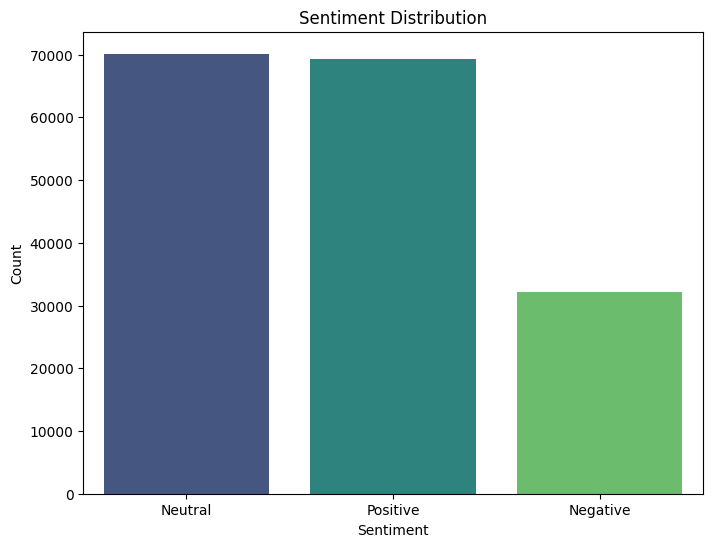

In [15]:
ut.plot_sentiments(df_tweets)

### WordClouds

#### Positive Sentiment - WordCloud

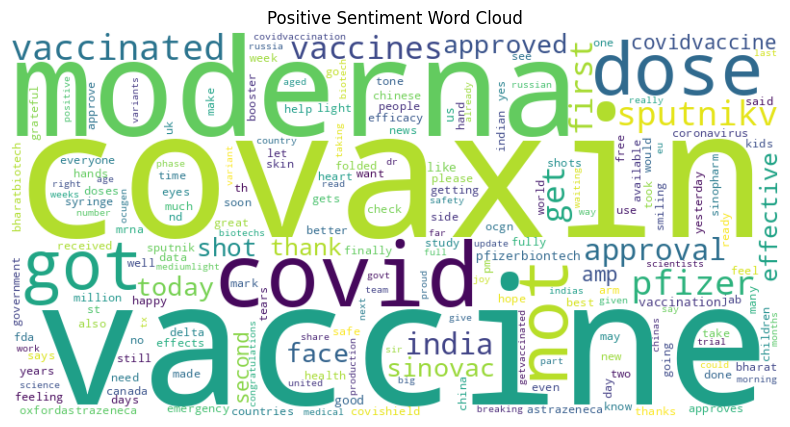

0                                   folk said daikon paste could treat cytokine storm pfizerbiontech
2    coronavirus sputnikv astrazeneca pfizerbiontech moderna covid russian vaccine created last year
5                       anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding
6                         bit sad claim fame success vaccination patriotic competition usa canada uk
7                                              not many bright day best bidenharris winning election
Name: clean_text, dtype: object

In [16]:
positive_tweets = df_tweets[df_tweets['sentiment'] == "Positive"]
negative_tweets = df_tweets[df_tweets['sentiment'] == "Negative"]
neutral_tweets = df_tweets[df_tweets['sentiment'] == "Neutral"]

ut.generate_word_cloud(positive_tweets['token_text'], 'Positive Sentiment Word Cloud')
positive_tweets['clean_text'].head(5)

In [17]:
ut.common_words(positive_tweets, 50)

#### Neutral Sentiment - WordCloud

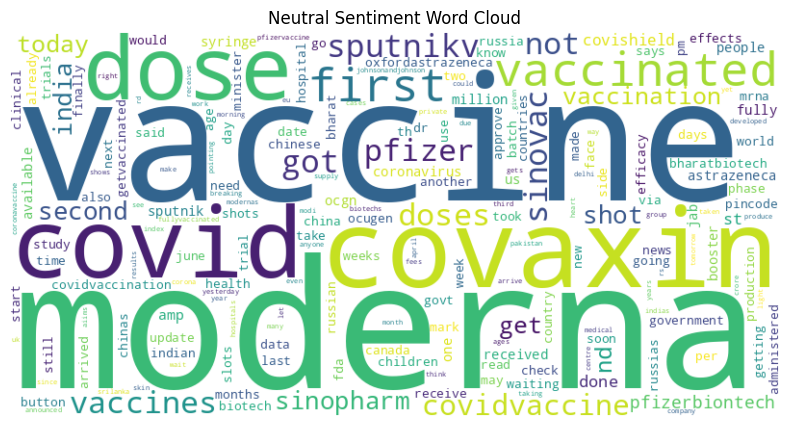

3                          fact immutable senator even not ethically sturdy enough acknowledge born
4                                      explain need vaccine whereareallthesickpeople pfizerbiontech
8                                   covid vaccine getting covidvaccine covid pfizerbiontech moderna
9     covidvaccine state start getting covidvaccine monday u say pakustv nyc healthcare globalgoals
14                  expect site across state receive vaccine monday another site tuesday said offic
Name: clean_text, dtype: object

In [18]:
ut.generate_word_cloud(neutral_tweets['token_text'], 'Neutral Sentiment Word Cloud')
neutral_tweets['clean_text'].head(5)

In [19]:
ut.common_words(neutral_tweets, 50)

#### Negative Sentiment - WordCloud

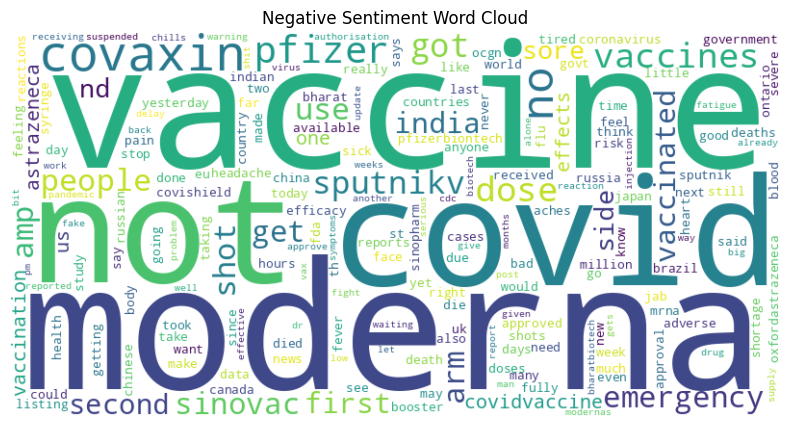

1                              world wrong side history year hopefully biggest vaccination effort ev
10                               death closing mark million people wait pfizerbiontech vaccine first
17                  coronavirus iran report new case death last hour iran coronavirus pfizerbiontech
18                                         rake billion expensive covidvaccine refuse cut price lowe
19    trump administration failed deliver vaccine promise shocker covidiots coronavirus covidvaccine
Name: clean_text, dtype: object

In [20]:
ut.generate_word_cloud(negative_tweets['token_text'], 'Negative Sentiment Word Cloud')
negative_tweets['clean_text'].head(5)

In [21]:
ut.common_words(negative_tweets, 50)

### N-Gram Analysis by sentiment

#### Uni-Gram

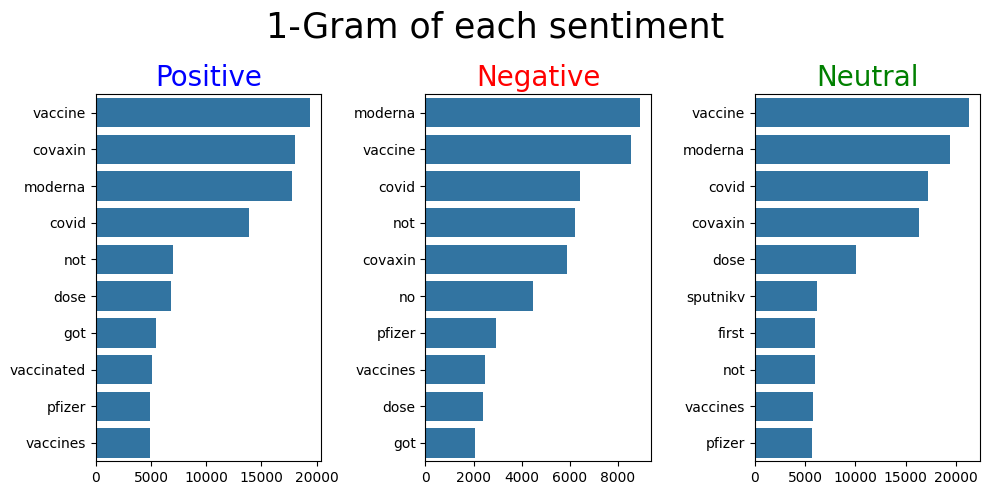

In [22]:
ut.plot_n_grams(df_tweets, 1)

#### Bi-Gram

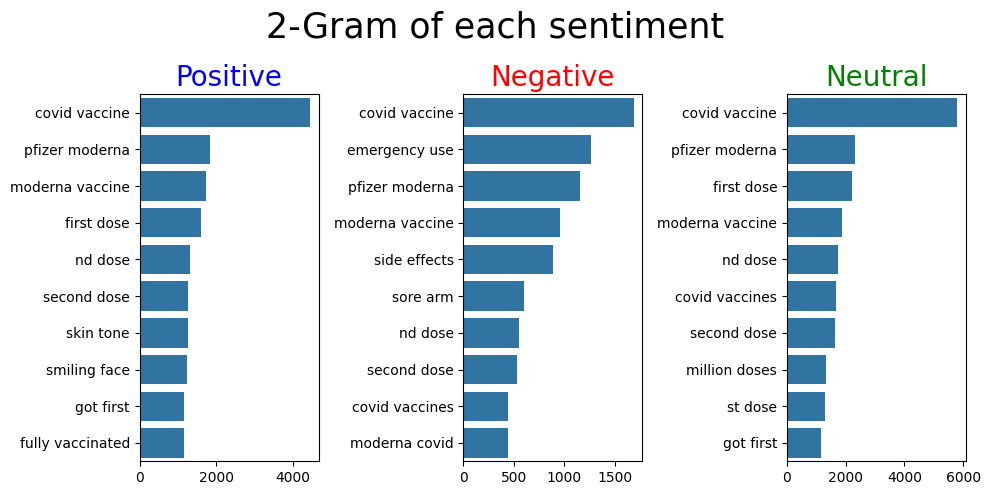

In [23]:
ut.plot_n_grams(df_tweets, 2)

#### Tri-Gram

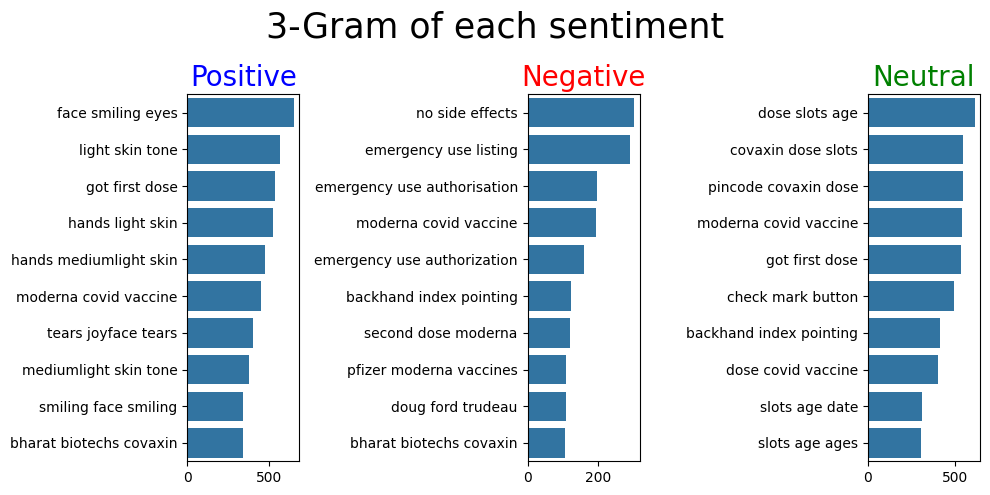

In [24]:
ut.plot_n_grams(df_tweets, 3)

### Plotting Average Word Amount by Sentiment

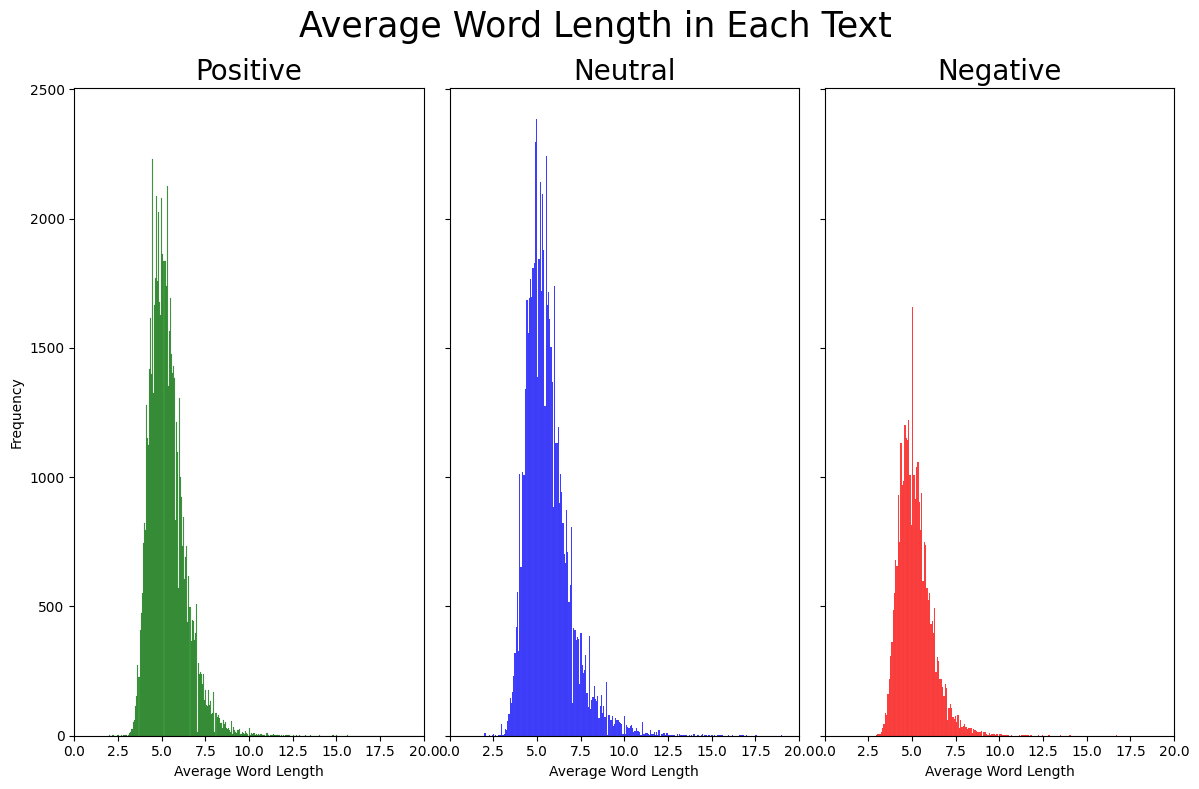

In [25]:
ut.plot_avg_word_length_distribution_multi(positive_tweets, neutral_tweets, negative_tweets)



## Geo-Spatial Sentiment Analysis

## Time-Series Analysis

In [26]:
# Function to filter the data to a single date and print tweets from users with the most followers
def date_filter(df, date):
    return df[df['date'].astype(str)==date].sort_values('user_followers', ascending=False)[['date' ,'orig_text']]

def date_printer(df, dates, num=10): 
    for date in dates:
        display(date_filter(df, date).head(num))
        
# Get tweets for vaccine Pfizer,Pfizer; Sinopharm;Sinovac;Moderna;AstraZeneca;Covaxin;Sputnik V.
df_tweets_pz = df_tweets[df_tweets['clean_text'].str.contains('pfizer', case=False, na=False)]
df_tweets_sinopharm = df_tweets[df_tweets['clean_text'].str.contains('sinopharm', case=False, na=False)]
df_tweets_sinovac = df_tweets[df_tweets['clean_text'].str.contains('sinovac', case=False, na=False)]
df_tweets_moderna = df_tweets[df_tweets['clean_text'].str.contains('moderna', case=False, na=False)]
df_tweets_astrazeneca = df_tweets[df_tweets['clean_text'].str.contains('astrazeneca', case=False, na=False)]
df_tweets_covaxin = df_tweets[df_tweets['clean_text'].str.contains('covaxin', case=False, na=False)]
df_tweets_sputnik = df_tweets[df_tweets['clean_text'].str.contains('sputnik', case=False, na=False)]

print('Number of tweets for Pfizer:', len(df_tweets_pz))
print('Number of tweets for Sinopharm:', len(df_tweets_sinopharm))
print('Number of tweets for Sinovac:', len(df_tweets_sinovac))
print('Number of tweets for Moderna:', len(df_tweets_moderna))
print('Number of tweets for AstraZeneca:', len(df_tweets_astrazeneca))
print('Number of tweets for Covaxin:', len(df_tweets_covaxin))
print('Number of tweets for Sputnik V:', len(df_tweets_sputnik))

Number of tweets for Pfizer: 20420
Number of tweets for Sinopharm: 7349
Number of tweets for Sinovac: 10283
Number of tweets for Moderna: 45327
Number of tweets for AstraZeneca: 6855
Number of tweets for Covaxin: 37935
Number of tweets for Sputnik V: 14829


### Sentiment Over Time

In [27]:
import datetime

# Assuming df_tweets is already defined and contains a 'date' column
df_tweets['date'] = pd.to_datetime(df_tweets['date']).dt.date

# Count tweets per day
tweets_per_day = df_tweets.groupby('date').size().reset_index(name='Tweets Per Day')

# Create the plot using Plotly Express
fig = px.line(tweets_per_day, x='date', y='Tweets Per Day')

# Add a horizontal line representing the mean of tweet counts
mean_tweet_count = tweets_per_day['Tweets Per Day'].mean()
fig.add_shape(type="line",
    x0=tweets_per_day['date'].min(), y0=mean_tweet_count, x1=tweets_per_day['date'].max(), y1=mean_tweet_count,
    line=dict(
        color="Green",
        width=3,
        dash="dashdot",
    ),
    name='Mean',
)

# Update the traces to include markers
fig.update_traces(mode="markers+lines")

# Add annotations
annotations = [
    dict(
        x=datetime.datetime(2021, 3, 1), 
        y=tweets_per_day.loc[tweets_per_day['date'] == datetime.date(2021, 3, 1), 'Tweets Per Day'].values[0],
        text='March 1',
        showarrow=True,
        arrowhead=3,
        bordercolor="#c7c7c7"
    ),
    dict(
        x=datetime.datetime(2021, 4, 21), 
        y=tweets_per_day.loc[tweets_per_day['date'] == datetime.date(2021, 4, 21), 'Tweets Per Day'].values[0],
        text='April 21',
        showarrow=True,
        arrowhead=3,
        yshift=5,
        bordercolor="#c7c7c7"
    ),
    dict(
        x=datetime.datetime(2021, 6, 30), 
        y=tweets_per_day.loc[tweets_per_day['date'] == datetime.date(2021, 6, 30), 'Tweets Per Day'].values[0],
        text='June 30',
        showarrow=True,
        arrowhead=3,
        yshift=5,
        ay=-30,
        bordercolor="#c7c7c7"
    ),
    dict(
        x=datetime.datetime(2021, 8, 11), 
        y=tweets_per_day.loc[tweets_per_day['date'] == datetime.date(2021, 8, 11), 'Tweets Per Day'].values[0],
        text='August 11',
        showarrow=True,
        arrowhead=3,
        yshift=5,
        ay=-30,
        bordercolor="#c7c7c7"
    ),dict(
        x=datetime.datetime(2021, 10, 12), 
        y=tweets_per_day.loc[tweets_per_day['date'] == datetime.date(2021, 10, 12), 'Tweets Per Day'].values[0],
        text='October 12',
        showarrow=True,
        arrowhead=3,
        yshift=5,
        ay=-30,
        bordercolor="#c7c7c7"
    ),dict(
        x=datetime.datetime(2021, 11, 3), 
        y=tweets_per_day.loc[tweets_per_day['date'] == datetime.date(2021, 11, 3), 'Tweets Per Day'].values[0],
        text='November 3',
        showarrow=True,
        arrowhead=3,
        yshift=5,
        ay=-30,
        bordercolor="#c7c7c7"
    )
]

for annotation in annotations:
    fig.add_annotation(annotation)

# Update layout
fig.update_layout(
    title='<b>Daily Tweets<b>',
    hovermode='x unified',
    width=1000
)

# Show the plot
fig.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


dates_to_check = ['2021-03-01','2021-04-21','2021-06-30','2021-08-11','2021-10-12','2021-11-03']

for date in dates_to_check:
    print("DATE: ", date)
    tweets_data = ut.get_tweets_by_date(df_tweets, date)
    ut.topic_modelling(tweets_data)
    print('---------------------------\n\n')

#for i in range(1,100):
    #print("index: ", i, tweets_on_specific_date.iloc[i])


DATE:  2021-03-01
Topic 1:
vaccine covaxin not sputnikv face pfizer pm covid oxfordastrazeneca take senior moderna would new breaking
Topic 2:
covaxin moderna sister niveda puducherry astrazeneca administered vaccine sinopharm mondaymotivation stake hand skin billion nurse
Topic 3:
covaxin sinovac great tear face not good vaccine no philippine china joy taking modiji thank
Topic 4:
covaxin pm first vaccine dose covid aiims took modi india take minister prime today bharat
---------------------------


DATE:  2021-04-21
Topic 1:
covaxin icmr variant neutralises effective multiple mutant double strain study covid sarscov show vaccine india
Topic 2:
moderna got vaccine covaxin face shot effect nd not day dose arm covid second side
Topic 3:
efficacy covaxin phase interim result vaccine biotech bharat covid trial severe bharatbiotech india clinical overall
Topic 4:
moderna vaccine covaxin covishield dose vaccinated not second covid shot done first pfizer get india
---------------------------

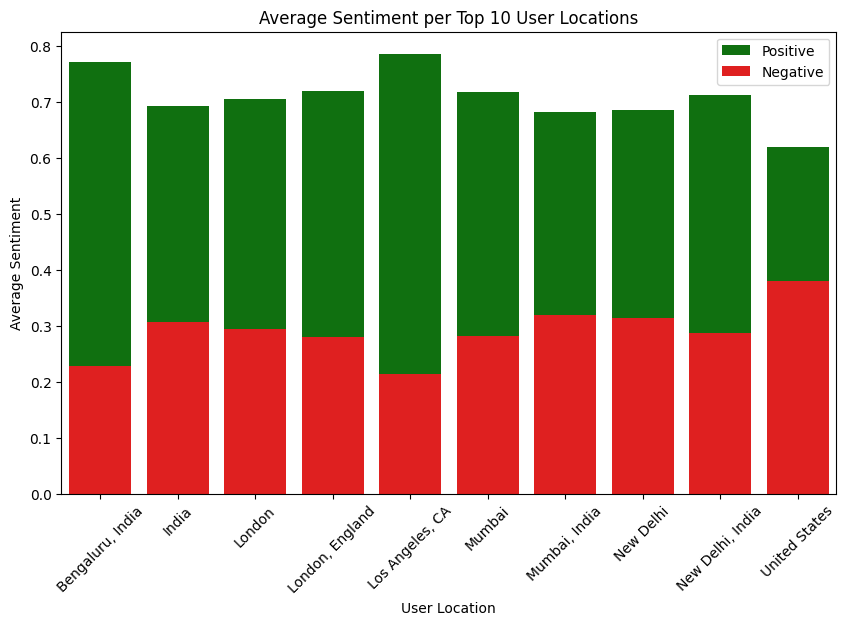

In [33]:
df_filtered = df_tweets[df_tweets['sentiment'] != 'Neutral']

# Group by 'user_location', calculate the average sentiment, and select the top 10 locations
top_10_locations = df_filtered.groupby('user_location')['sentiment'].value_counts().unstack().fillna(0).sum(axis=1).nlargest(10).index

# Filter DataFrame to include only the top 10 locations
df_top_10 = df_filtered[df_filtered['user_location'].isin(top_10_locations)]

# Group by 'user_location' and calculate the average sentiment
avg_sentiment = df_top_10.groupby('user_location')['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sentiment.index, y=avg_sentiment['Positive'], color='green', label='Positive')
sns.barplot(x=avg_sentiment.index, y=avg_sentiment['Negative'], color='red', label='Negative')
plt.ylabel('Average Sentiment')
plt.xlabel('User Location')
plt.title('Average Sentiment per Top 10 User Locations')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [30]:
#tweets_data = ut.get_tweets_by_date(df_tweets, '2021-11-03')
#for i in range(1,2000):
#   print("index: ", i, tweets_data.iloc[i])


index:  1 orig_text     Annnnnd, BOOSTED!  💉💉💉\n#Moderna https://t.co/vhRHOObFue
clean_text               annnnnd boosted syringesyringesyringe moderna
Name: 213131, dtype: object
index:  2 orig_text     @JoannaLedgard @Burkley Everyone else is going through the same thing. The better question is, when will people lik… https://t.co/pBodTHnCkc
clean_text                                                                                            everyone else going thing better question people lik
Name: 213132, dtype: object
index:  3 orig_text     @JamesCranworth Why don't they just declare war on #Pfizer and #Moderna instead of going on about this peacefully?… https://t.co/oheGVeo6e2
clean_text                                                                                        not declare war pfizer moderna instead going peacefully
Name: 213133, dtype: object
index:  4 orig_text     @NSWHealth gigs up reveal the truth people are in hospital from adverse reactions or dying from vaccin

IndexError: single positional indexer is out-of-bounds

In [ ]:
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets['datedt'] = pd.to_datetime(df_tweets['date'])
df_tweets['date'] = df_tweets['datedt'].dt.date
df_tweets['year'] = df_tweets['datedt'].dt.year
df_tweets['month'] = df_tweets['datedt'].dt.month
df_tweets['day'] = df_tweets['datedt'].dt.day
df_tweets['dayofweek'] = df_tweets['datedt'].dt.dayofweek
df_tweets['hour'] = df_tweets['datedt'].dt.hour
df_tweets['minute'] = df_tweets['datedt'].dt.minute
df_tweets['dayofyear'] = df_tweets['datedt'].dt.dayofyear
df_tweets['date_only'] = df_tweets['datedt'].dt.date

# Get counts of number of tweets by sentiment for each date
timeline = df_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

# Plot results

fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},color_discrete_sequence=[ '#EF553B','#636EFA', '#00CC96'], title='Number of Tweets by Sentiment Over Time')
fig.show()

There are some spikes in the data, which may be due to some events that happened in the world. Let's investigate them further.

In [ ]:
spike = df_tweets[df_tweets['date'].astype(str)=='2021-03-01']
spike['user_location'].value_counts().head(10)

user_location
India               229
New Delhi, India    127
Mumbai, India        45
New Delhi            41
Bengaluru, India     31
Mumbai               25
Delhi                25
Hyderabad, India     24
Pune, India          20
London, England      15
Name: count, dtype: int64

In [ ]:
spike = spike.sort_values('user_location', ascending=False)
spike['orig_text'].head(10)

18084                        Before magreact, do the research how the vaccine works, regardless the brands and the efficacy rates. #TheVaccineIsSafe #Sinovac
17555          I find this Photo by @cpimspeak\nTo be offensive and degrading , \nIt is depicting something truly against the commun… https://t.co/X51R4sFQYq
15285                 🇮🇳 PM Shri @narendramodi took his first dose of the #COVID19 #Vaccine at AIIMS Delhi today.\nHe led the way in… https://t.co/tKLRgz3vml
16532          Got call at 9 am from health department and mom got #COVAXIN shot at 1 pm.\n\nThey do really care about their citizen… https://t.co/VdMUMXS9Nx
16901    #mRNAvaccine #PfizerBionTech\n#Moderna #Katalinkariko\n#NianshuangWang #Mclellan\n\nAs for J&amp;J, Astrazeneca, the effcti… https://t.co/tK1U6LFboZ
17442                                        @narendramodi Where is Your Mask\nAnd Which one You Taken\n#CovishieldVaccine or #Covaxin???\nPfizer or Moderna?
14334                  @PahariaSonia @narendramodi d

It looks like the Prime Minister of India took the first dose of the Covid 19 vaccine on March 1st, 2021. This event caused a spike in the number of tweets and we can see that the sentiment is mostly positive.

#### Covaxin

In [ ]:
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    vac_tweets = df_tweets[df_tweets['clean_text'].str.contains(vax, case=False, na=False)]
    
    timeline = vac_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index()
    fig = px.line(timeline, x='date', y='tweets', color='sentiment', color_discrete_map={'Positive': '#00CC96', 'Negative': '#EF553B', 'Neutral': '#636EFA'},title=title_str)

    fig.show()
    return vac_tweets

covaxin = filtered_timeline(df_tweets, 'covaxin', title='Covaxin')

In [ ]:
covaxin_spike = covaxin[covaxin['date'].astype(str)=='2021-11-03']
print('Number of tweets on 2021-11-03:', len(covaxin_spike))
covaxin_spike['user_location'].value_counts().head(10)

Number of tweets on 2021-11-03: 1396


user_location
India                152
New Delhi, India      66
Mumbai, India         35
New Delhi             26
California, USA       19
Mumbai                19
I speak: 🇬🇧 🇫🇷 🇷🇺     16
Bengaluru, India      15
Hyderabad, India      15
Chennai, India        13
Name: count, dtype: int64

In [ ]:
covaxin_spike = covaxin[covaxin['user_location']=='India']

date_printer(covaxin_spike, ['2021-11-03'], num=5)

,date,orig_text
216213,2021-11-03,#TrendingTonight | This (#Covaxin) is a great vaccine and the WHO approval shows the credibility of our scientific… https://t.co/AB3rNJdlfS
216226,2021-11-03,"#TrendingTonight | #Covaxin is also a symbol of the success of our R&amp;D and industry partnership: Dr VK Paul, Member… https://t.co/WCsuMHzvnV"
216216,2021-11-03,"#TrendingTonight | Dr Randeep Guleria, Director, AIIMS, on @WHO approval for #Covaxin https://t.co/3cSeeXsZit"
215951,2021-11-03,"""#Covaxin Didn't Take Longest"": WHO Clears Air On India vs China Claim https://t.co/7SyGPYw8bB https://t.co/DrMfbP7OJ5"
216335,2021-11-03,"#NDTVExclusive | Kiran Mazumdar-Shaw (@kiranshaw), Executive Chairperson, Biocon, on @WHO's approval for #COVAXIN https://t.co/izihHlDHwj"


After a brief investigation we found out that Covaxin was approved for emergency use by WHO (World Health Organization) on May 3rd, 2021. This led to a positive spike in the tweets.

#### Sinopharm

In [ ]:
sinopharm = filtered_timeline(df_tweets, 'sinopharm', title='Sinopharm')


In [ ]:
sinopharm_spike = sinopharm[sinopharm['date'].astype(str)=='2021-08-13']
print('Number of tweets on July 13th:', len(sinopharm_spike))


print(sinopharm_spike['orig_text'].head(10))

# Count how many duplicate tweets there are
print('Number of duplicate tweets:', len(sinopharm_spike[sinopharm_spike.duplicated(subset='clean_text')]))

Number of tweets on July 13th: 47
158908           89yo man, who’s in good health, died of breathlessness on Aug13 after receiving his first Covid-19 jab (Sinopharm W… https://t.co/iN5NjiC4Ov
158911           In #Rangoon, an 89-year-old man died just days after receiving #Sinopharm vaccine, according to his family.The vacc… https://t.co/leyH7tW3y5
159799           @SaveMM99 @aapp_burma @womenofburma @UNWomenWatch An 89-year-old man died just days after receiving #Sinopharm vacc… https://t.co/WGnH505p6i
160732                                                                                                         Just got my #1stdose of #Sinopharm #vaccine 💉🩹
160733           An 89-year-old man in #Rangoon died a few days after receiving the #Sinopharm vaccine.  He was in good health befor… https://t.co/HwiBnjE4hb
162663                   #Peru study finds #Sinopharm vaccine 50.4% effective against infections https://t.co/Zc9TwrR7Sh \n#Sharjah24 https://t.co/wM3DwZLg4J
162664    #Sinopha

For the Sinopharm vaccine there was one major event that happened. An 89 year old man died after taking the vaccine. This event lead to a huge number of negative tweets.
Additionally, we observed a notable prevalence of duplicate data within the dataset, with 821 similar tweets recorded on that day.

#### Sinovac

In [ ]:
sinovac = filtered_timeline(df_tweets, 'sinovac', title='Sinovac')

In [ ]:
sinovac_spike = sinovac[sinovac['date'].astype(str)=='2021-06-02']

print('Number of tweets on June 2nd:', len(sinovac_spike))

date_printer(sinovac_spike, ['2021-06-02'], num=10)

Number of tweets on June 2nd: 241


,date,orig_text
89452,2021-06-02,Indonesian health officials: Two full shots of #Sinovac is 98 percent effective in preventing death https://t.co/XXD4NMbNX2
89554,2021-06-02,#Gavi in talks with China's #Sinovac to expand COVAX supply https://t.co/tHKXIQONYF
89597,2021-06-02,"#WHO's approval of #Sinovac's #COVID19 vaccine proves Chinese vaccines are safe and effective, Chinese Foreign Mini… https://t.co/duT4MblUTd"
89505,2021-06-02,#China's second COVID-19 vaccine '#Sinovac' has been approved for emergency use listing.\n\n#COVID19 #COVIDVaccine… https://t.co/uy2Nm8gHg2
89465,2021-06-02,The Gavi vaccine alliance is in talks with Chinese drugmaker #Sinovac Biotech to expand the #COVAX dose-sharing por… https://t.co/ieIR55bVMB
89650,2021-06-02,Listen to @BT_India news #podcast with @rashopines \n#coronavirus #electricity #vaccines #whatsappindia #Sinovac… https://t.co/iTkHBrmYUf
89709,2021-06-02,WHO approves Sinovac COVID shot in second Chinese milestone\n#COVID19 #CovidIndia #CovidVaccine #WHO #Sinovac #China\nhttps://t.co/OrPFIbm7AM
89547,2021-06-02,The World Health Organization has issued an emergence use listing for the #COVID19 vaccine made by #Sinovac in adul… https://t.co/uBpwJDqcBN
89727,2021-06-02,#NSTbusiness #Pharmaniaga Bhd's latest contract to supply seven million doses of #Sinovac #Covid19 vaccine to gover… https://t.co/GeyIwCMlsb
89571,2021-06-02,"#FAQ | WHO approved a COVID vaccine by #Sinovac Biotech for emergency use, making it the second Chinese shot to be… https://t.co/R4szkb1jn4"


Similar to the Covaxin vaccine, the Sinovac vaccine was also approved for emergency use by WHO on June 6th, 2021. This event led to a mostly positive sentiment in the tweets.

#### Moderna

In [ ]:
moderna = filtered_timeline(df_tweets, 'moderna', title='Moderna')

There were numerous spikes related to the Moderna vaccine. Let's focus on the positive spike that happened on June 29th.

In [ ]:
date_printer(moderna, ['2021-06-29'], num=10)

,date,orig_text
120362,2021-06-29,"#Moderna Seeks Nod For Vaccine In India, Cipla For Import, Sale: Sources \n\nNDTV's Sukirti Dwivedi reports\n\nRead mor… https://t.co/fnXUCCV9aV"
120278,2021-06-29,#Cipla Allowed To Import #Moderna Vaccine For Use In India: Sources \n\nNDTV’s Sukirti Dwivedi reports\n\nRead more:… https://t.co/BjFu26UvsR
120150,2021-06-29,#Cipla Allowed To Import #Moderna Vaccine For Use In India \n\nNDTV’s Sukirti Dwivedi reports\n\nRead more:… https://t.co/1apwxoCwQg
120230,2021-06-29,"#CovidVaccine | ""New drug permission has been granted to #Moderna, the first internationally developed vaccine. Thi… https://t.co/d1nm7YEOlE"
119978,2021-06-29,#NewsAlert | #DCGI grants permission to import #Moderna #Covid vaccine for restricted emergency use.\n\n'I'd like you… https://t.co/2Yik9QtHyF
120144,2021-06-29,"New drug permission has been granted to #Moderna, the first internationally developed #CovidVaccine. This new drug… https://t.co/9Ngq8n2RDi"
119881,2021-06-29,#Moderna Inc. climbed to a record high amid growing concern about a more contagious variant of #Covid19 in nations… https://t.co/TOuowfbzkW
120052,2021-06-29,#COVIDVaccine | #Moderna vaccine enters Indian market; Pfizer next? \n\nModerna jab will be India's first mRNA… https://t.co/DErZJo2CK8
120274,2021-06-29,".@Cipla_Global /Moderna gets DCGI nod for import of #COVID19 vaccine\n\n""Drugs Controller General of India (DCGI) has… https://t.co/LOgAVPg9y8"
119778,2021-06-29,#Moderna’s Covid vaccine approved for use in India\n\n(reports @RamblingBrook)\n \nhttps://t.co/5oKg0HtYuL https://t.co/VWRucpRLRO


On June 29th, 2021, India granted approval for the importation and utilization of the Moderna vaccine. This development sparked a notable increase in positive tweets.

#### AztraZeneca

In [ ]:
astrazeneca = filtered_timeline(df_tweets, 'astrazeneca', title='AstraZeneca')

In [ ]:
date_printer(astrazeneca, ['2021-03-16'], num=10)

,date,orig_text
30826,2021-03-16,"On an average, 9 out of every 10 vaccine dose administered in India were #AstraZeneca's #Covishield vaccine. Here’s… https://t.co/6GOYtTZzbj"
30569,2021-03-16,"Oxford-AstraZeneca vaccine is safe and works extremely well, says UK PM Boris Johnson\n#OxfordAstraZeneca… https://t.co/iXMCQ8IOLY"
29483,2021-03-16,"#ETReports | National AEFI Committee will review #Covaxin, #Covishield this week due to #AstraZeneca scare\n\nEuropea… https://t.co/2dMXQ1fFyt"
30672,2021-03-16,This is brilliant on the #OxfordAstraZeneca #vaccine suspensions around the globe https://t.co/HyZnJn5AVw
30645,2021-03-16,Have you got worries about other countries suspending the use of the #OxfordAstraZeneca vaccine?\n\nSpeaking on Break… https://t.co/vMcQOfMiU7
29201,2021-03-16,"#WHO urges nations to continue using the Oxford-AstraZeneca #COVID19Vaccine, says reports of blood clots not necess… https://t.co/lEhOg4qmpv"
30875,2021-03-16,#BREAKING : India to export Bharat Bio-Tech COVAXIN to USA. After #AstraZeneca facing fresh obstacles in European… https://t.co/uOILmnFbrD
30604,2021-03-16,The First 65000 doses of the COVID-19 #OxfordAstraZeneca vaccine have arrived at the nation's capital. #Somaliland… https://t.co/eGa3sE3K50
30705,2021-03-16,Some EU countries ordered AstraZeneca late hence there is a 2 weeks delay in vaccine roll out. A delay that could c… https://t.co/hJiUa12xwI
30636,2021-03-16,Just walked down #LeakeStreet #SE1 on my way from my first #OxfordAstraZeneca #CovidVaccine at the\nSt Thomas' Vacci… https://t.co/R59SDy1OrY


#### Sputnik V

In [ ]:
sputnik = filtered_timeline(df_tweets, 'sputnik', title='Sputnik V')


dates = ['2021-04-12', '2021-05-14']

date_printer(sputnik, dates, num=5)

,date,orig_text
57910,2021-04-12,India closer to getting 3rd #covid19 vaccine as panel clears Russia's #SputnikV \n\nDr Reddy's conducted clinical tri… https://t.co/AmXFskY8UV
58170,2021-04-12,Why is the vaccine named #SputnikV? How does the vaccine work?\n\nAll you need to know\nhttps://t.co/82TsLi0bBj
55586,2021-04-12,Expert panel to meet today to decide on #SputnikV vaccine emergency approval\n\n#CovidVaccine… https://t.co/8SM56RsKHP
58358,2021-04-12,"If approved, #SputnikV will be the third COVID-19 vaccine to be available in India https://t.co/X9iDmnyFtc"
58505,2021-04-12,Just in | SEC recommends #SputnikV vaccine for emergency use authorisation in India.\n- @BShajan reports.


,date,orig_text
78025,2021-05-14,#JustIn | Dr Reddy's administers first dose of the #SputnikV vaccine in Hyderabad
77873,2021-05-14,"First doses of #SputnikV administered in India. Deepak Sapra, Global Head of Custom Pharma Services at @drreddys La… https://t.co/6psT3q60QX"
77834,2021-05-14,"#SputnikV (Imported) To Cost Rs 995/Shot, Made-In-India May Be Cheaper https://t.co/NQ9AkDEQwN https://t.co/CeOdM1VxfQ"
77311,2021-05-14,"When, Where And How Much - Your Questions About #SputnikV Answered https://t.co/kMnUYHGpYU https://t.co/IahSWfARAg https://t.co/NFvolXVBOH"
77285,2021-05-14,"#NDTVExclusive | “Pricing details of India-manufactured vaccine (#SputnikV) not decided”: Deepak Sapra, CEO and API… https://t.co/1O6OaYdMkS"


#### Pfizer

In [ ]:
pfizer = filtered_timeline(df_tweets, 'pfizer', title='Pfizer')

In [ ]:
date_printer(pfizer, ['2021-08-23'], num=10)

,date,orig_text
172008,2021-08-23,#PfizerBioNTech #COVID19vaccine first to secure full approval from #USFDA... via @BT_India https://t.co/BbmkRvbEih
174422,2021-08-23,⚡Top Stories: Everything You Need to Know About #InformedConsent and more... @21stCenturyWire #Pfizer #Moderna - https://t.co/98K0VGtqH3
172626,2021-08-23,A study comparing antibody levels after 2 doses of the #Sinovac or #Pfizer #COVID19 vaccines found that Sinovac pro… https://t.co/g0MRxm6JQR
172000,2021-08-23,The US Food and Drug Administration (@US_FDA) on Monday gave full approval to the #PfizerBioNTech #COVID19Vaccine.… https://t.co/PMMp7lM0UF
174387,2021-08-23,Obviously someone from Pfizer paid off the FDA for full approval because #Moderna and J&amp;J were not approved fully.… https://t.co/0hHYF9EOwJ
172001,2021-08-23,"Following the #FDA's full approval of the #PfizerBioNTech #Covid19 vaccine, it has been confirmed that it is now ma… https://t.co/XzxLCgbBqw"
172026,2021-08-23,"The FDA granted full approval to the Pfizer-BioNTech vaccine, a first for a #Covid19 jab in the U.S. Analysts say t… https://t.co/q3Wl2b66fj"
172016,2021-08-23,Pfizer-BioNTech's #Covid19 vaccine has become the first jab to be granted full approval by the US Food and Drug Adm… https://t.co/Ho0bB2jZmZ
174445,2021-08-23,⚠️ Important #MedTwitter &amp; parents:\n\nThe doses of the #Pfizer &amp; #Moderna #COVID19 #vaccine being studied in… https://t.co/OAHL99O4PP
174466,2021-08-23,@bethkoob @ItsMrsRabbitToU Won't be too long before #Moderna gets FDA approval. It's just as good as #Pfizer.


The biggest peak of positive engagement for the Pfizer vaccine seems to relate to it's approval by the US FDA, the first vaccine to do so.

In [ ]:
## WORK IN PROGRESS
locations = {
    'India': {'lat': 23.309469, 'long': 78.532748},
    'United States': {'lat': 36.434542, 'long': -103.931671},
    'China': {'lat': 35.377854, 'long': 103.165949},
}
country_counts = {country: 0 for country in locations.keys()}
for index, tweet in df_tweets.iterrows():
    user_location = str(tweet['user_location'])  # Convert to string
    # If the user location contains a country name
    for country in locations.keys():
        if country in user_location:
            country_counts[country] += 1  # Increment count for the country
            break

data = []
for country, count in country_counts.items():
    data.append({'Location': country, 'Latitude': locations[country]['lat'], 'Longitude': locations[country]['long'], 'Number of Tweets': count})

df_locations = pd.DataFrame(data)

print(df_locations)
fig = px.scatter_mapbox(df_locations, lat="Latitude", lon="Longitude", hover_name="Number of Tweets", size = 'Number of Tweets',color="Number of Tweets", 
                    color_continuous_scale=px.colors.sequential.Plasma, size_max=15, zoom=1,
                   mapbox_style="carto-positron")
fig.show()

        Location   Latitude   Longitude  Number of Tweets
0          India  23.309469   78.532748             23564
1  United States  36.434542 -103.931671              2437
2          China  35.377854  103.165949              1275


In [ ]:
def bar_plot(df, title, x, y, color, color_discrete_sequence, angle, size, rge=0, scale=''):
    # Plot the mean sentiment scores for each vaccine

    if(scale!=''):
        fig = px.bar(df, x, y, title=title, labels={x: x, y: y}, color=color, color_continuous_scale=scale)
    else:
        if(rge==0):
            fig = px.bar(df, x, y, title=title, labels={x: x, y: y}, color=color, color_discrete_sequence=color_discrete_sequence)
        else:
            fig = px.bar(df, x, y, title=title, labels={x: x, y: y}, color=color, color_discrete_sequence=color_discrete_sequence, range_y=[-rge, rge])

    # Rotate x-axis labels for better readability
    fig.update_layout(xaxis_tickangle=angle)
    # bigger figure
    fig.update_layout(width=size[0], height=size[1])
        
    # Show plot
    fig.show()

In [ ]:
# Count occurrences of each location
location_counts = df_tweets['user_location'].value_counts().reset_index()
location_counts.columns = ['user_location', 'count']

# Sort locations by count in descending order
location_counts = location_counts.sort_values(by='count', ascending=False)

# Select top 10 locations
top_10_locations = location_counts.head(10)

colors = px.colors.qualitative.Set1[:10]  # Using a qualitative color palette for variety

bar_plot(top_10_locations, 'Top 10 User Locations', 'user_location', 'count', 'user_location', colors, -45, (900, 600))




As can be seen, most of the tweets in the dataset have origin in India.

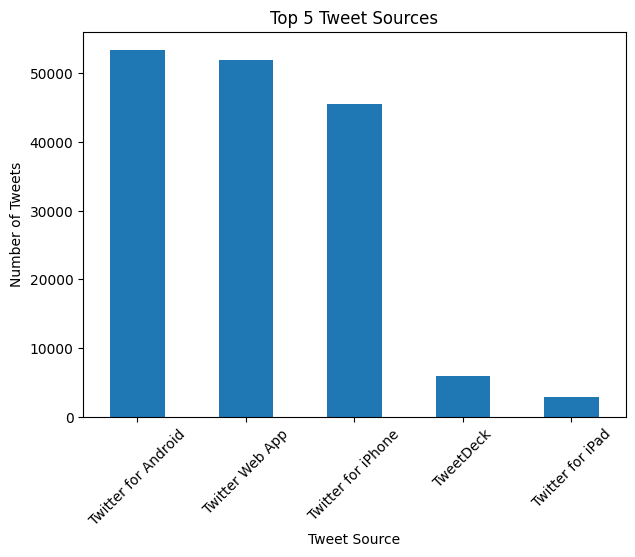

In [ ]:
plt.figure(figsize=(7,5))
df_tweets['source'].value_counts().nlargest(5).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 5 Tweet Sources')

plt.ylabel('Number of Tweets')
plt.xlabel('Tweet Source')
plt.show()


Tweets are similar distributed among the biggest 3 platforms: Android, Web and Iphone.

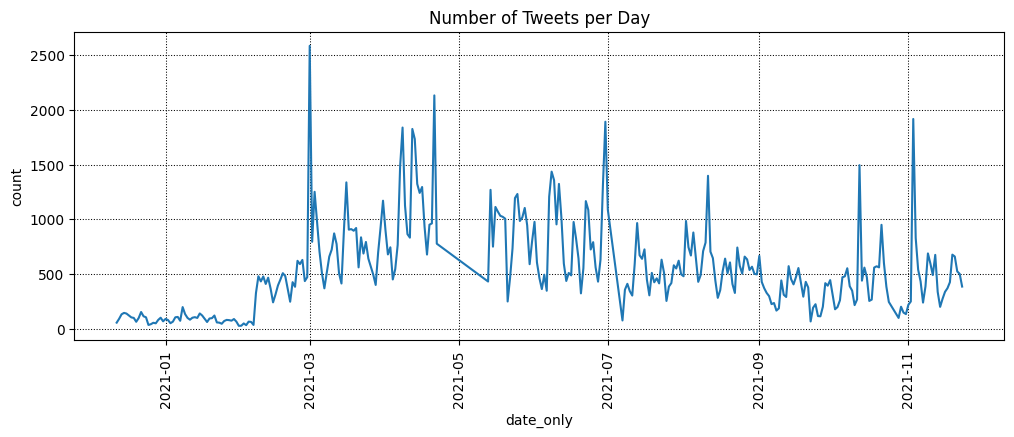

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue = None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(3*size,1*size))
   
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

tweets_agg_df = df_tweets.groupby(["date"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

plot_time_variation(tweets_agg_df, title="Number of Tweets per Day", x='date_only', y='count', size=4)

In [ ]:
# Count occurrences of each country
country_counts = df_tweets['user_location'].value_counts().reset_index()
country_counts.columns = ['user_location', 'tweet_count']

# Select top 10 countries with the most appearances in tweets
top_10_countries = country_counts.nlargest(10, 'tweet_count')

mean_sentiment_by_country = df_tweets.groupby('user_location')['vader_score'].mean().reset_index()
mean_sentiment_by_country.columns = ['user_location', 'mean_sentiment']
#select only countries in top 10
mean_sentiment_by_country = mean_sentiment_by_country[mean_sentiment_by_country['user_location'].isin(top_10_countries['user_location'])]
colors = px.colors.qualitative.Set1[:10]
bar_plot(mean_sentiment_by_country, 'Mean Sentiment of Top 10 Countries with Most Appearances in Tweets', 'user_location', 'mean_sentiment', 'user_location', colors, -45, (900,600), .5)





Sentiment Analisys reveals tweets from most proeminent geographic locations in the dataset had a rather positive sentiment towards COVID (most certainly not to COVID itself, but optimistic news), while in Toronto and in the rest of the world it was the opposite.

In [ ]:
def calculate_mean_sentiment(df):
    return df['vader_score'].mean()

# Calculate the mean sentiment score for each vaccine
mean_sentiments = {
    'Pfizer': calculate_mean_sentiment(df_tweets_pz),
    'Sinopharm': calculate_mean_sentiment(df_tweets_sinopharm),
    'Sinovac': calculate_mean_sentiment(df_tweets_sinovac),
    'Moderna': calculate_mean_sentiment(df_tweets_moderna),
    'AstraZeneca': calculate_mean_sentiment(df_tweets_astrazeneca),
    'Covaxin': calculate_mean_sentiment(df_tweets_covaxin),
    'Sputnik V': calculate_mean_sentiment(df_tweets_sputnik)
}

# Convert mean sentiments to a DataFrame
mean_sentiments_df = pd.DataFrame(list(mean_sentiments.items()), columns=['Vaccine', 'Mean Sentiment']).sort_values('Mean Sentiment', ascending=False)
colors = px.colors.qualitative.Set1[:7]

# Plot the mean sentiment scores for each vaccine
bar_plot(mean_sentiments_df, 'Mean Sentiment Scores for Each Vaccine', 'Vaccine', 'Mean Sentiment', 'Vaccine', colors, -45, (900, 600), .15)


As can be seen, all vacines had rather positive views from the public.

### Decomposition of a Time Series 

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
result_mul = seasonal_decompose(tweets_agg_df['count'], model='multiplicative', extrapolate_trend='freq', period=150)

# Additive Decomposition
result_add = seasonal_decompose(tweets_agg_df['count'], model='additive', extrapolate_trend='freq', period=150)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
result_mul.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

result_add.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


ModuleNotFoundError: No module named 'statsmodels'

### Test for Stationarity

#### Augmented Dickey Fuller test (ADF Test)

#### Kwiatkowski-Phillips-Schmidt-Shin – KPSS test

#### Philips Perron test

### Test for Seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

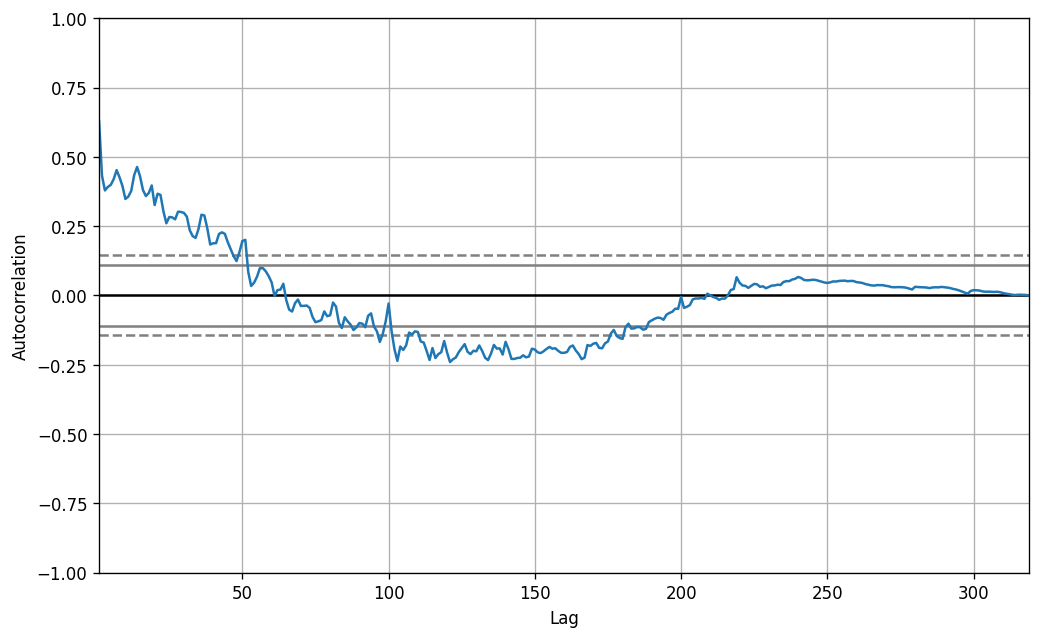

In [ ]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(tweets_agg_df['count'].tolist())

### Autocorrelation and Partial Autocorrelation

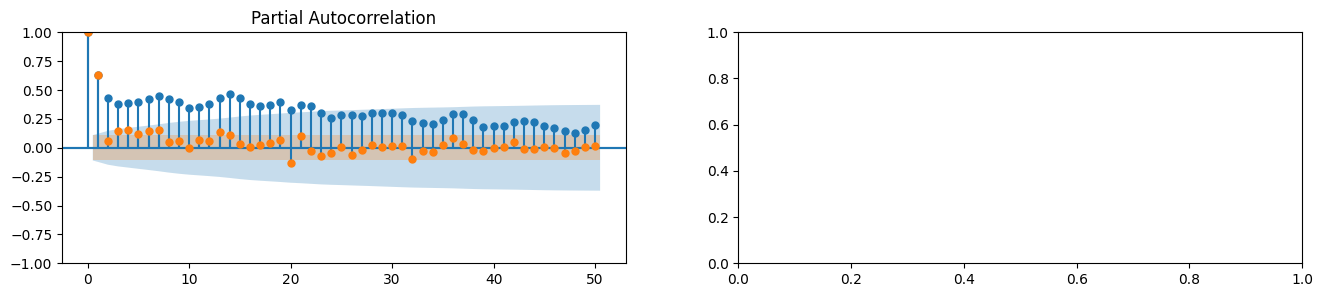

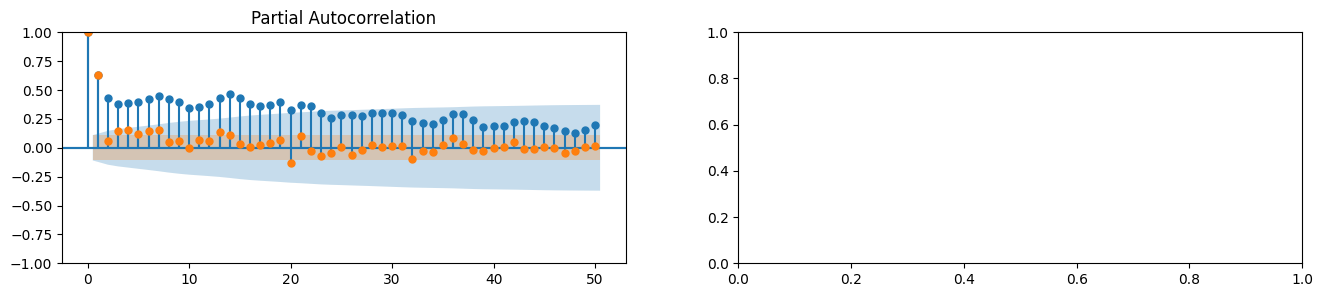

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(tweets_agg_df['count'].tolist(), lags=50, ax=axes[0])
plot_pacf(tweets_agg_df['count'].tolist(), lags=50, ax=axes[0])


In [ ]:
#Number of tweets per day of the week
df_dayofweek = df_tweets.groupby('dayofweek').size().reset_index(name='count')
df_dayofweek['dayofweek'] = df_dayofweek['dayofweek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

df_dayofweek['dayofweek'] = pd.Categorical(df_dayofweek['dayofweek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

colors = px.colors.qualitative.Set1
bar_plot(df_dayofweek, 'Number of Tweets per Day of the Week', 'dayofweek', 'count', 'dayofweek', colors, 0, (900, 600))

Tweets regarding COVID were more proeminent during the week days than during the weekend. It may be related to the scheduled release of weekly reports.

In [ ]:
#Number of tweets per hour
df_hour = df_tweets.groupby('hour').size().reset_index(name='count')
df_hour = df_hour.sort_values('count', ascending=False)
px.colors.qualitative.Vivid
colors = px.colors.qualitative.Set2[:10]
scale = "aggrnyl"
bar_plot(df_hour, 'Number of Tweets per Hour', 'hour', 'count', 'count', colors, 0, (900, 600),0,scale)



As expected, most tweets happened during day hours.

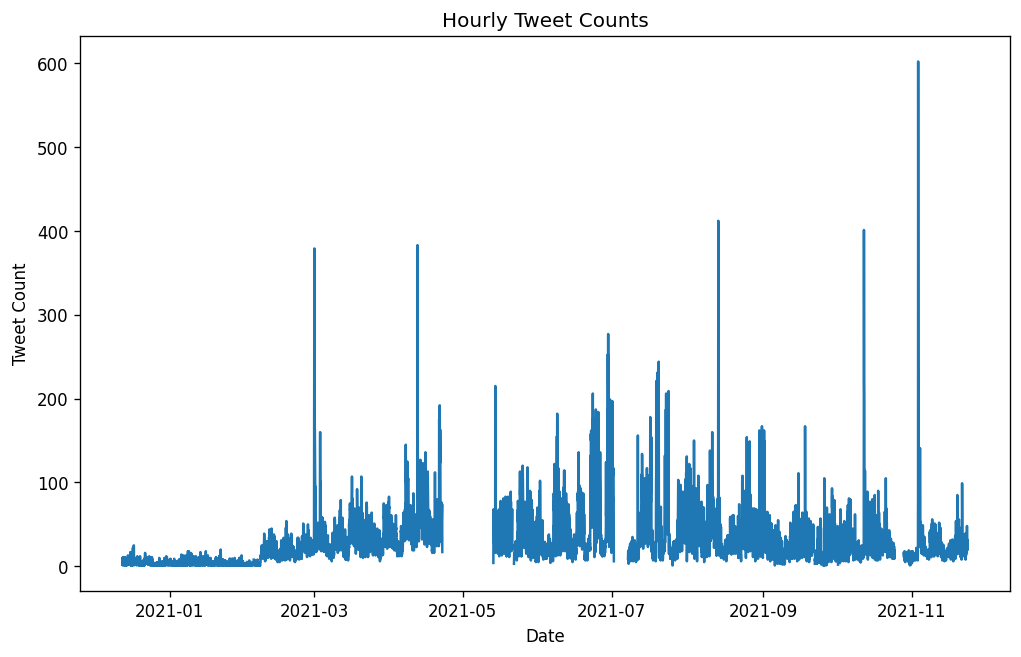

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

tweet_counts_hourly = df_tweets.groupby(['year', 'month', 'day', 'hour']).size().reset_index(name='tweet_count')

# Convert date columns to datetime format
tweet_counts_hourly['date'] = pd.to_datetime(tweet_counts_hourly[['year', 'month', 'day', 'hour']])

# Drop redundant columns
tweet_counts_hourly.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Set 'date' column as index
tweet_counts_hourly.set_index('date', inplace=True)
tweet_counts_hourly = tweet_counts_hourly.asfreq('H')
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts_hourly.index, tweet_counts_hourly['tweet_count'])
plt.title('Hourly Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.show()





date
2021-09-15 14:00:00    38.401999
2021-09-15 15:00:00    52.728008
2021-09-15 16:00:00    35.968366
2021-09-15 17:00:00    32.930167
2021-09-15 18:00:00    51.349815
Name: predicted_mean, dtype: float64


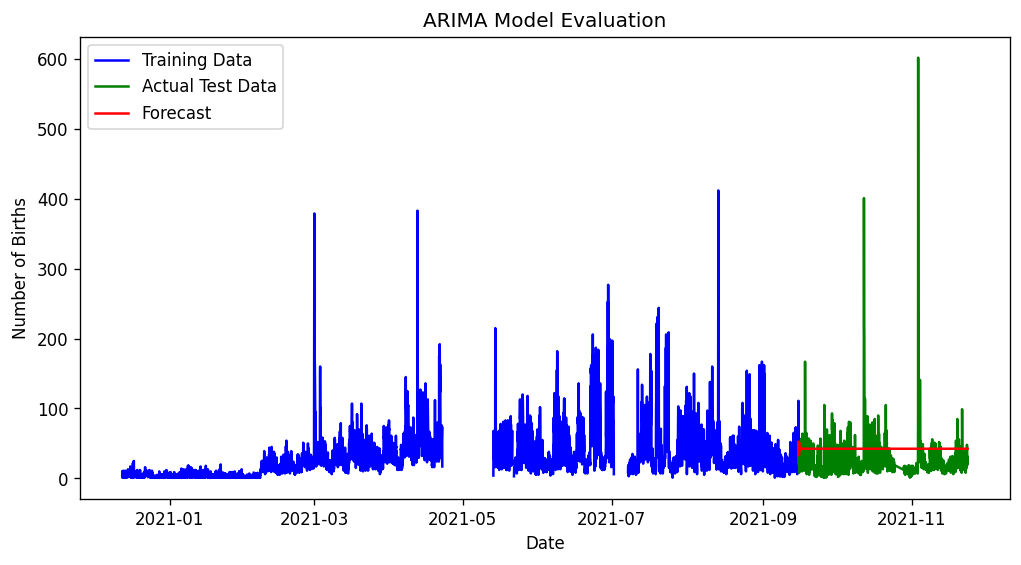

RMSE: 33.07790454962007


In [ ]:
# Split the data into train and test
train_size = int(len(tweet_counts_hourly) * 0.8)
train, test = tweet_counts_hourly[0:train_size], tweet_counts_hourly[train_size:len(tweet_counts_hourly)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train, order=(5,1,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

test = test.dropna()
test_forecast_series = test_forecast_series.dropna()

test_forecast_series = test_forecast_series.loc[test.index]

mse = mean_squared_error(test['tweet_count'], test_forecast_series)

# Calculate the mean squared error
mse = mean_squared_error(test['tweet_count'], test_forecast_series)
rmse = mse**0.5

print(test_forecast_series.head(5)  )
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data', color='blue')

plt.plot(test, label='Actual Test Data', color='green')
plt.plot(test_forecast_series, label='Forecast', color='red')


plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)

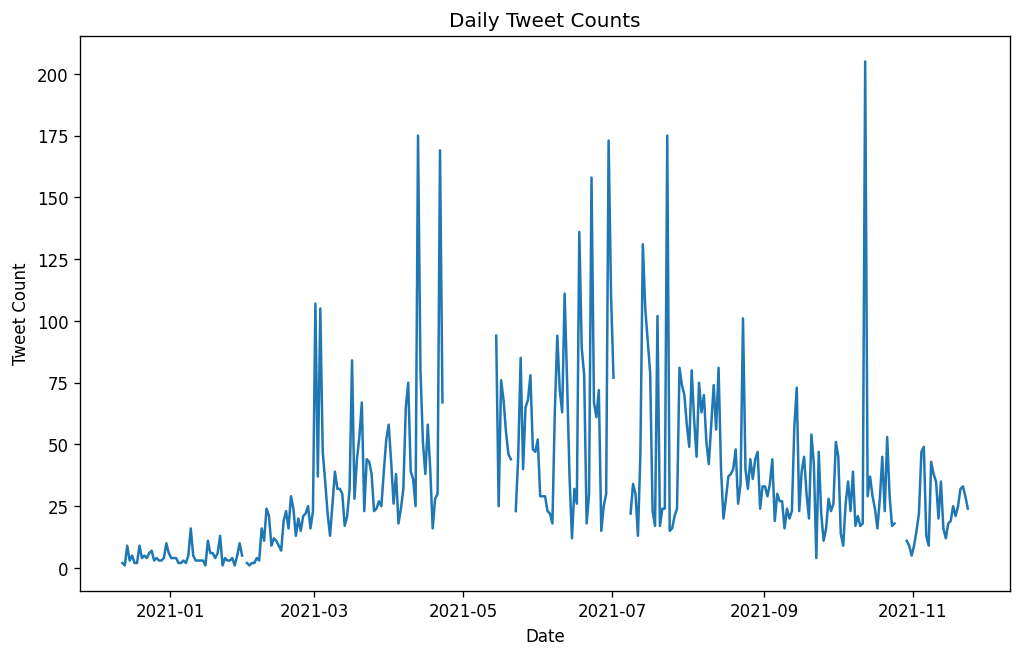

In [ ]:
# Aggregate tweet counts by day
tweet_counts_daily = df_tweets.groupby(['year', 'month', 'day']).size().reset_index(name='tweet_count')

# Convert date columns to datetime format
tweet_counts_daily['date'] = pd.to_datetime(tweet_counts_daily[['year', 'month', 'day']])


# Drop redundant columns
tweet_counts_daily.drop(columns=['year', 'month', 'day'], inplace=True)

# Set 'date' column as index

tweet_counts_daily.set_index('date', inplace=True)
tweet_counts_daily = tweet_counts_hourly.asfreq('D')

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts_daily.index, tweet_counts_daily['tweet_count'])
plt.title('Daily Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.show()

date
2021-08-09 00:00:00    19.396540
2021-08-09 01:00:00    15.676016
2021-08-09 02:00:00    17.600685
2021-08-09 03:00:00    16.915417
2021-08-09 04:00:00    17.760908
Freq: h, Name: predicted_mean, dtype: float64
date
2021-08-09 00:00:00    19.396540
2021-08-09 01:00:00    15.676016
2021-08-09 02:00:00    17.600685
2021-08-09 03:00:00    16.915417
2021-08-09 04:00:00    17.760908
Freq: h, Name: predicted_mean, dtype: float64


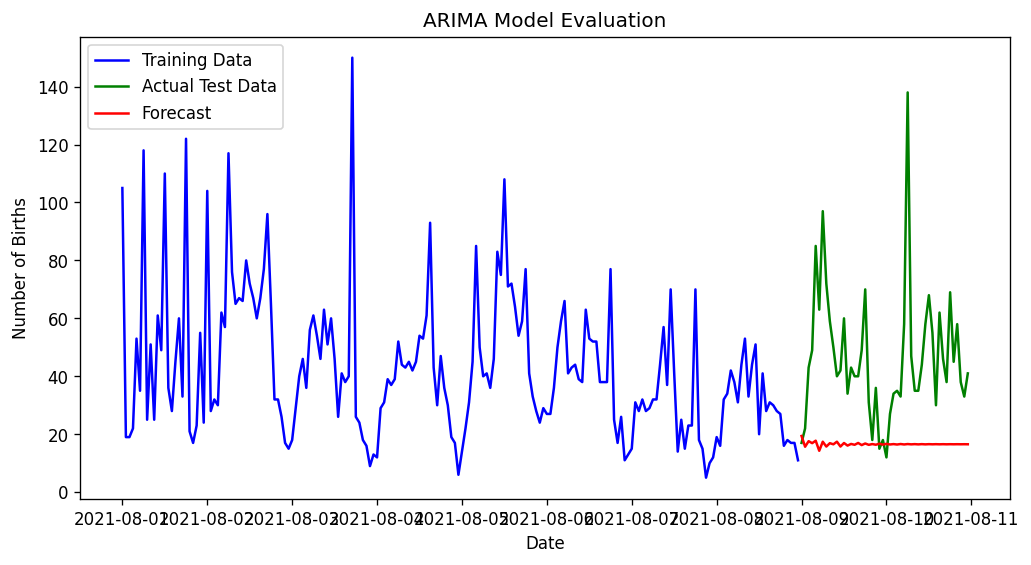

RMSE: 37.24567532192098


In [ ]:
data = tweet_counts_hourly[tweet_counts_hourly.index.month == 8]
data = data[data.index.year == 2021]
# days from 1 to 4
data = data[data.index.day <= 10]




# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]


# Fit the ARIMA model on the training dataset
model_train = ARIMA(train, order=(5,1,0))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

test = test.dropna()
test_forecast_series = test_forecast_series.dropna()

test_forecast_series = test_forecast_series.loc[test.index]
print(test_forecast_series.head(5))


# Calculate the mean squared error
mse = mean_squared_error(test['tweet_count'], test_forecast_series)
rmse = mse**0.5

print(test_forecast_series.head(5)  )
# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(10,5))
plt.plot(train, label='Training Data', color='blue')

plt.plot(test, label='Actual Test Data', color='green')
plt.plot(test_forecast_series, label='Forecast', color='red')



plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

print('RMSE:', rmse)

High RMSE shows low seasonality in the dataset and how hard it would be to predict tweet count regarding a random event like the COVID epidemic.

C:\Users\h_enr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\h_enr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\h_enr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



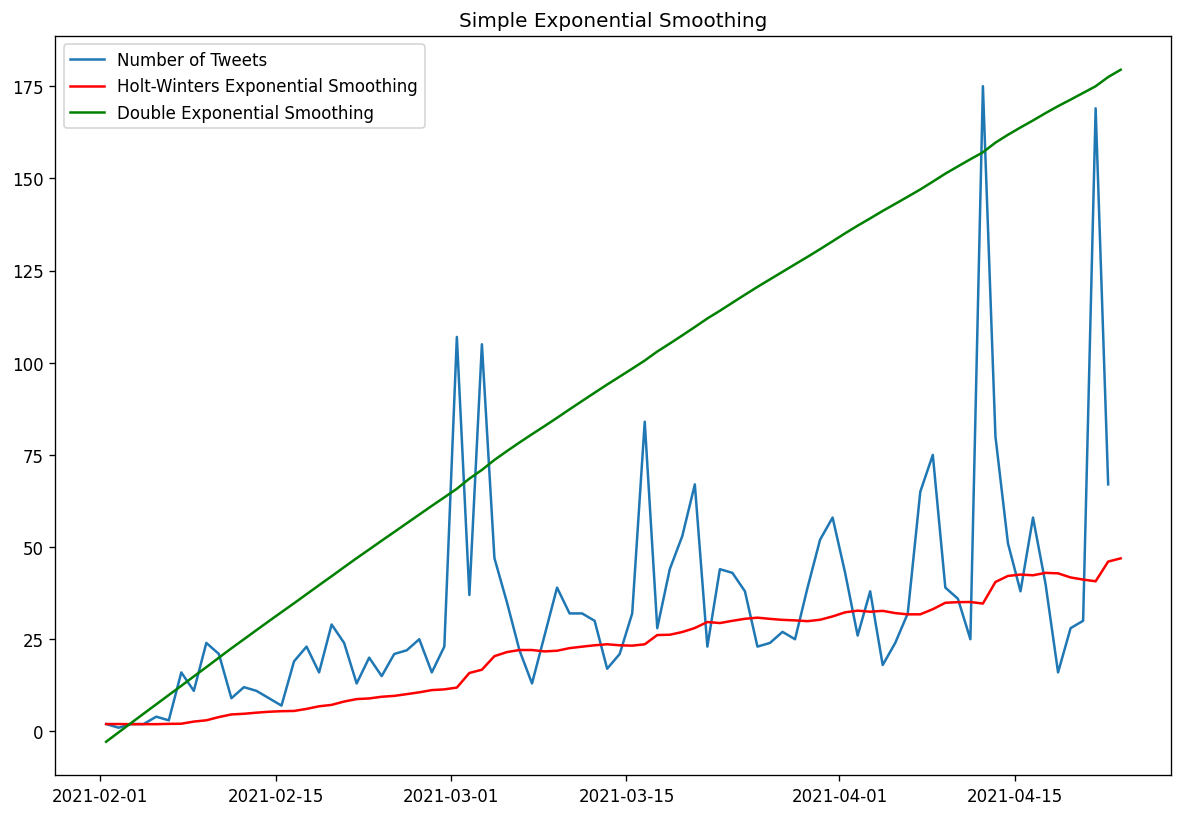

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing


data = tweet_counts_daily[tweet_counts_daily.index.month >= 2]
data = data[data.index.month <= 4]
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

data['Holt'] = SimpleExpSmoothing(data['tweet_count']).fit(smoothing_level=alpha,optimized=False, use_brute=True).fittedvalues
data['HWES2_ADD'] = ExponentialSmoothing(data['tweet_count'],trend='add').fit().fittedvalues



# Plot
plt.figure(figsize=(12,8))
plt.plot(data['tweet_count'], label='Number of Tweets')
plt.plot(data['Holt'], label='Holt-Winters Exponential Smoothing', color='red')
plt.plot(data['HWES2_ADD'], label='Double Exponential Smoothing', color='green')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()


C:\Users\h_enr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\Users\h_enr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



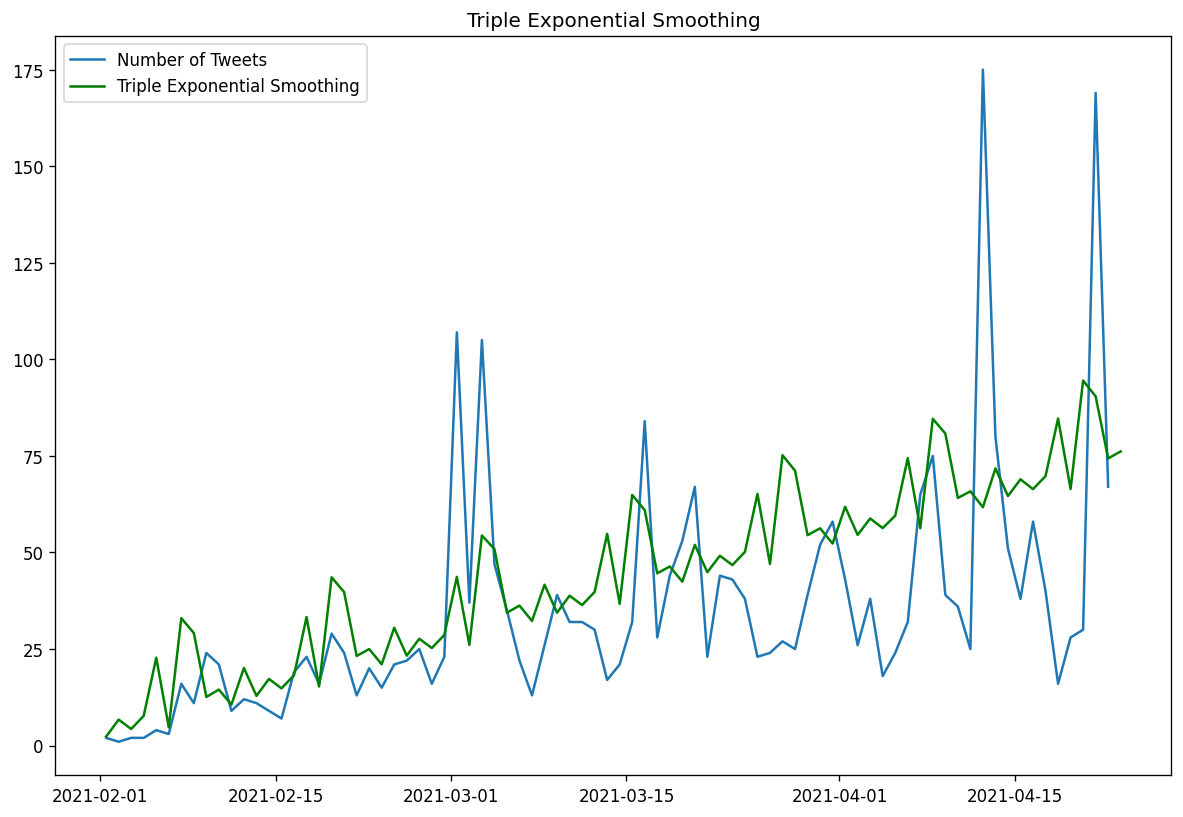

In [ ]:
data['HWES3_ADD'] = ExponentialSmoothing(data['tweet_count'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues


# Plot
plt.figure(figsize=(12,8))
plt.plot(data['tweet_count'], label='Number of Tweets')

plt.plot(data['HWES3_ADD'], label='Triple Exponential Smoothing', color='green')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


Despite not achieving great success using exponential smoothing for forecasting, triple exponential smoothing proved to be substatially more successful in comparision to other strategies, being able to predict the overall tendency of the tweet count.